In [1]:
import pandas as pd
import numpy as np
import glob
import time
import datetime
import matplotlib.pyplot as plt

In [2]:
df_pop = pd.read_csv('data/PEP_2017_PEPANNRES_with_ann.csv')

In [3]:
def state(x):
    return x.split(',')[1].strip()

In [4]:
df_pop['Geography'] = df_pop['Geography'].apply(lambda x : state(x))

In [5]:
fil = ['Population Estimate (as of July 1) - 2010',
       'Population Estimate (as of July 1) - 2011',
       'Population Estimate (as of July 1) - 2012',
       'Population Estimate (as of July 1) - 2013',
       'Population Estimate (as of July 1) - 2014',
       'Population Estimate (as of July 1) - 2015',
       'Population Estimate (as of July 1) - 2016',
       'Population Estimate (as of July 1) - 2017', '2018', '2019']

In [6]:
df_pop_group = df_pop.groupby(by= 'Geography').sum()
df_pop_group['2018'] = df_pop_group['Population Estimate (as of July 1) - 2017']
df_pop_group['2019'] = df_pop_group['Population Estimate (as of July 1) - 2017']
df_pop_group_filtered = df_pop_group[fil]
df_group_fill = df_pop_group_filtered.rename(index=str, columns={'Population Estimate (as of July 1) - 2010': "2010",
                                                 'Population Estimate (as of July 1) - 2011': "2011",
                                                'Population Estimate (as of July 1) - 2012': "2012",
                                                'Population Estimate (as of July 1) - 2013': "2013",
                                                'Population Estimate (as of July 1) - 2014': "2014",
                                                'Population Estimate (as of July 1) - 2015': "2015",
                                                'Population Estimate (as of July 1) - 2016': "2016",
                                                'Population Estimate (as of July 1) - 2017': "2017"})
df_pop_group_transposed = df_group_fill.T

In [7]:
df_pop_group_transposed.head()

Geography,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Village of Islands village; Florida,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2010,2900633,493950,5040545,1894294,31034987,3701484,1382043,255678,605040,9523656,...,3773005,18652772,2518199,151733,6123,2965076,4370326,641052,4082012,386943
2011,2909860,498890,5091919,1910690,31337469,3758133,1387920,258207,620336,9653153,...,3803552,18948920,2555375,151684,6178,2984843,4425306,640288,4093312,389835
2012,2921270,504448,5160889,1921669,31638945,3816045,1390687,260877,635630,9773302,...,3845405,19270747,2591664,151879,6238,3012201,4478481,640081,4106573,396514
2013,2932769,508207,5225224,1931774,31930588,3879500,1394066,262698,650114,9889630,...,3873438,19561007,2634606,151981,6349,3033738,4530863,638409,4117682,401123
2014,2942104,507289,5302652,1941970,32235676,3943313,1394022,265121,660797,10047497,...,3907166,19892894,2671117,151774,6433,3049522,4589591,635212,4129086,401827


In [8]:
all_files = glob.glob("weather//*.csv")

In [9]:
all_files

['weather/kansas.csv',
 'weather/new_york.csv',
 'weather/Rhode Island.csv',
 'weather/west_virginia.csv',
 'weather/virginia.csv',
 'weather/nebraska.csv',
 'weather/indiana.csv',
 'weather/delaware.csv',
 'weather/vermont.csv',
 'weather/north_carolina.csv',
 'weather/illinois.csv',
 'weather/new_jersey.csv',
 'weather/idaho.csv',
 'weather/arkansas.csv',
 'weather/louisiana.csv',
 'weather/iowa.csv',
 'weather/texas.csv',
 'weather/montana.csv',
 'weather/florida.csv',
 'weather/arizona.csv',
 'weather/california.csv',
 'weather/south_carolina.csv',
 'weather/new_mexico.csv',
 'weather/north_dakota.csv',
 'weather/massachusetts.csv',
 'weather/michigan.csv',
 'weather/tennessee.csv',
 'weather/oregon.csv',
 'weather/new_hampshire.csv',
 'weather/alabama.csv',
 'weather/kentucky.csv',
 'weather/south_dakota.csv',
 'weather/minnesota.csv',
 'weather/utah.csv',
 'weather/pennsylvania.csv',
 'weather/oklahoma.csv',
 'weather/mississippi.csv',
 'weather/ohio.csv',
 'weather/connecticut.c

In [10]:
def clean_column(df):
    state = df.columns[-1]
    new_name = state.split(',')[0].split('at')[-1].strip()
    return df.rename(index=str, columns={state:new_name})

In [11]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    cdf = clean_column(df)
    li.append(cdf)
    

df_state_temp = pd.concat(li, axis=1, ignore_index=False)

In [12]:
state_fil = ['DateTime','Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

In [13]:
df_tem = df_state_temp[state_fil].T

In [14]:
def df_cleaner(df):
    df['DateTime'] = df['DateTime'].map(lambda x:x[:-6])
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    #temp = df.columns[-1]
    #df_clean = df.rename(index=str, columns={temp: "Temp"})
    return df
temp_df = df_cleaner(df_tem[47:].T)

In [15]:
temp_df.head()

,DateTime,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2010-01-01,40.0127,55.3755,32.3807,46.3552,21.6736,31.0786,36.0468,32.4793,59.1436,...,2.3536,29.9925,39.2045,26.2333,25.295,33.8407,37.4346,28.2909,10.801,20.2588
1,2010-01-02,31.0145,59.7187,29.1911,48.1811,24.9217,26.0944,26.7742,23.8793,46.7987,...,2.3097,21.5515,39.6597,28.7071,22.0311,22.1713,37.5503,17.0548,1.6272,25.6732
2,2010-01-03,28.6783,57.6563,28.0702,47.9973,22.6881,16.6275,22.8357,18.4253,41.3483,...,10.3516,18.943,40.8042,25.4448,14.8298,18.3974,35.2607,12.1687,3.556,20.1452
3,2010-01-04,26.4526,58.0939,25.7808,48.2947,19.6948,20.1441,27.6359,24.089,40.7194,...,9.5022,18.8152,36.7959,24.5314,17.7571,21.1581,35.3925,17.7453,7.7328,17.0026
4,2010-01-05,24.3592,60.1993,22.2492,48.5458,24.1542,20.3164,29.1409,26.82,39.9166,...,10.6938,18.1409,35.9701,27.0522,17.3833,23.9011,37.6686,20.0035,10.9947,23.596


In [16]:
state_lst = ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

In [17]:
df_pop_clean = df_pop_group_transposed[state_lst]


In [18]:
df_pop_clean.head(2)

Geography,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2010,2900633,5040545,1894294,31034987,3701484,1382043,255678,605040,9523656,4206292,...,569628,3773005,18652772,2518199,151733,2965076,4370326,641052,4082012,386943
2011,2909860,5091919,1910690,31337469,3758133,1387920,258207,620336,9653153,4256167,...,574798,3803552,18948920,2555375,151684,2984843,4425306,640288,4093312,389835


In [19]:
df_pop_clean['total'] = df_pop_clean.sum(axis = 1)

/home/victor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_pop_perc = df_pop_clean.apply(lambda x: x/ df_pop_clean['total'])

In [21]:
df_pop_perc.head(2)

Geography,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,total
2010,0.015144,0.026317,0.009890,0.162036,0.019326,0.007216,0.001335,0.003159,0.049724,0.021961,...,0.019699,0.097388,0.013148,0.000792,0.015481,0.022818,0.003347,0.021313,0.002020,1.0
2011,0.015069,0.026368,0.009894,0.162280,0.019461,0.007187,0.001337,0.003212,0.049988,0.022040,...,0.019697,0.098126,0.013233,0.000785,0.015457,0.022916,0.003316,0.021197,0.002019,1.0


In [22]:
df_pop_perc = df_pop_perc.reset_index()

In [23]:
df_pop_perc = df_pop_perc.rename(index=str, columns={'index': 'Date'})
df_pop_perc['Date']= df_pop_perc['Date'].apply(lambda x : int(x))

In [24]:
df_pop_perc.head(2)

Geography,Date,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,total
0,2010,0.015144,0.026317,0.009890,0.162036,0.019326,0.007216,0.001335,0.003159,0.049724,...,0.019699,0.097388,0.013148,0.000792,0.015481,0.022818,0.003347,0.021313,0.002020,1.0
1,2011,0.015069,0.026368,0.009894,0.162280,0.019461,0.007187,0.001337,0.003212,0.049988,...,0.019697,0.098126,0.013233,0.000785,0.015457,0.022916,0.003316,0.021197,0.002019,1.0


In [25]:
df_pop_perc['Alabama'][0]

0.015144457981911523

In [26]:
temp_df.head()

,DateTime,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2010-01-01,40.0127,55.3755,32.3807,46.3552,21.6736,31.0786,36.0468,32.4793,59.1436,...,2.3536,29.9925,39.2045,26.2333,25.295,33.8407,37.4346,28.2909,10.801,20.2588
1,2010-01-02,31.0145,59.7187,29.1911,48.1811,24.9217,26.0944,26.7742,23.8793,46.7987,...,2.3097,21.5515,39.6597,28.7071,22.0311,22.1713,37.5503,17.0548,1.6272,25.6732
2,2010-01-03,28.6783,57.6563,28.0702,47.9973,22.6881,16.6275,22.8357,18.4253,41.3483,...,10.3516,18.943,40.8042,25.4448,14.8298,18.3974,35.2607,12.1687,3.556,20.1452
3,2010-01-04,26.4526,58.0939,25.7808,48.2947,19.6948,20.1441,27.6359,24.089,40.7194,...,9.5022,18.8152,36.7959,24.5314,17.7571,21.1581,35.3925,17.7453,7.7328,17.0026
4,2010-01-05,24.3592,60.1993,22.2492,48.5458,24.1542,20.3164,29.1409,26.82,39.9166,...,10.6938,18.1409,35.9701,27.0522,17.3833,23.9011,37.6686,20.0035,10.9947,23.596


In [27]:
temp_df['Year'] =temp_df['DateTime']
def moy(x):
    #test = df_shift_final['DateTime'][x]
    date = datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S")
    return date.year
temp_df['Year'] = temp_df['Year'].apply(lambda x : moy(x))

In [28]:
temp_df.head()

,DateTime,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,2010-01-01,40.0127,55.3755,32.3807,46.3552,21.6736,31.0786,36.0468,32.4793,59.1436,...,29.9925,39.2045,26.2333,25.295,33.8407,37.4346,28.2909,10.801,20.2588,2010
1,2010-01-02,31.0145,59.7187,29.1911,48.1811,24.9217,26.0944,26.7742,23.8793,46.7987,...,21.5515,39.6597,28.7071,22.0311,22.1713,37.5503,17.0548,1.6272,25.6732,2010
2,2010-01-03,28.6783,57.6563,28.0702,47.9973,22.6881,16.6275,22.8357,18.4253,41.3483,...,18.943,40.8042,25.4448,14.8298,18.3974,35.2607,12.1687,3.556,20.1452,2010
3,2010-01-04,26.4526,58.0939,25.7808,48.2947,19.6948,20.1441,27.6359,24.089,40.7194,...,18.8152,36.7959,24.5314,17.7571,21.1581,35.3925,17.7453,7.7328,17.0026,2010
4,2010-01-05,24.3592,60.1993,22.2492,48.5458,24.1542,20.3164,29.1409,26.82,39.9166,...,18.1409,35.9701,27.0522,17.3833,23.9011,37.6686,20.0035,10.9947,23.596,2010


In [29]:
temp_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [30]:
final_temp_df = pd.DataFrame()
for x in temp_list:
    tempo = temp_df[temp_df.Year == x]
    pop_temp =df_pop_perc[df_pop_perc.Date == x]
    test_temp = tempo[state_lst] * np.array(pop_temp[state_lst])
    test_temp['temp'] = test_temp.sum(axis = 1)
    temp = tempo[['DateTime', 'Year']]
    df_temp = temp.merge(test_temp['temp'], left_index=True, right_index=True)
    df_temp.pop('Year')
    final_temp_df = pd.concat([final_temp_df,df_temp], axis=0, ignore_index=False)
        

In [31]:
final_temp_df.tail(2)

,DateTime,temp
3359,2019-03-14,48.571017
3360,2019-03-15,46.214892


In [32]:
d = pd.read_csv('data/cleaned_data_together.csv')
def df_cleaner(df):
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    return df
df = df_cleaner(d)
#df = df.set_index(pd.DatetimeIndex(df.DateTime))

/home/victor/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


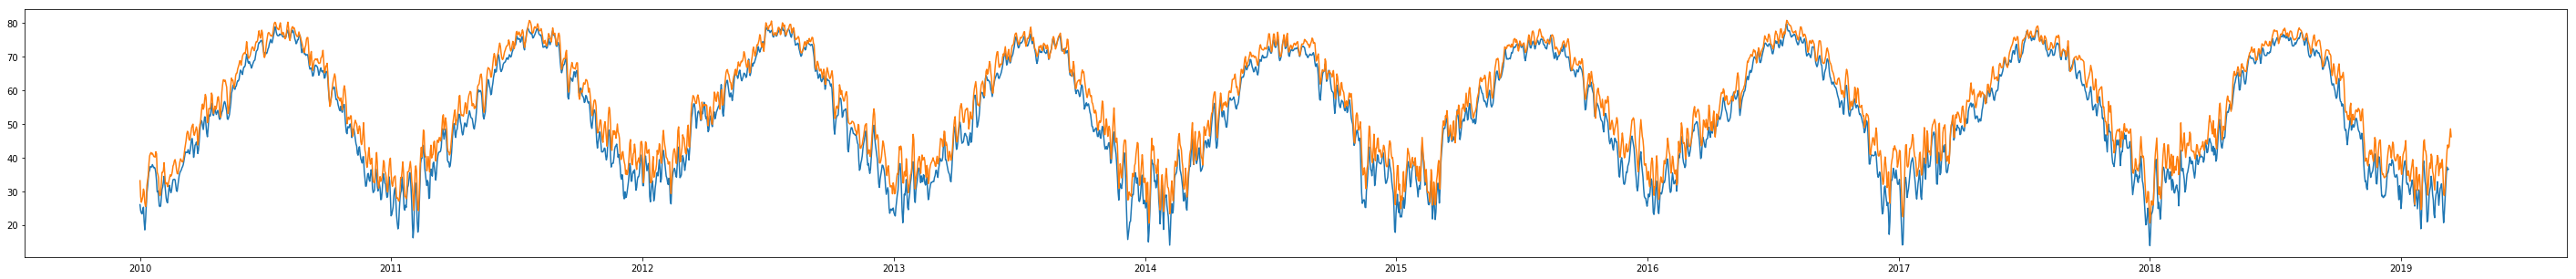

In [33]:
fig, ax = plt.subplots(figsize=(50,5))
ax.plot(df['DateTime'], df['Temp'])
ax.plot(final_temp_df['DateTime'], final_temp_df['temp'])

In [34]:
#df['Temp'] = final_temp_df['temp']

In [35]:
df.head()

,DateTime,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF,DOY
0,2010-01-01,5.82,26.0317,2197157.0,3117.0,255035.0,1666520.0,1
1,2010-01-02,5.82,24.2249,2197157.0,3117.0,255035.0,1666520.0,2
2,2010-01-03,5.82,23.5537,2197157.0,3117.0,255035.0,1666520.0,3
3,2010-01-04,6.09,23.2831,2197157.0,3117.0,255035.0,1666520.0,4
4,2010-01-05,6.19,24.5469,2197157.0,3117.0,255035.0,1666520.0,5


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 8 columns):
DateTime                   3357 non-null datetime64[ns]
Henry Hub Price $/MMBtu    3357 non-null float64
Temp                       3357 non-null float64
Production MMCF            3357 non-null float64
Storage BCFE               3357 non-null float64
Reserves BCFE              3357 non-null float64
Consumption MMCF           3357 non-null float64
DOY                        3357 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 209.9 KB


In [37]:
finito = final_temp_df[:3357]

In [38]:
finito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3357 entries, 0 to 3356
Data columns (total 2 columns):
DateTime    3357 non-null datetime64[ns]
temp        3357 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 78.7+ KB


In [39]:
finito.head()

,DateTime,temp
0,2010-01-01,33.150210
1,2010-01-02,28.389823
2,2010-01-03,26.753999
3,2010-01-04,27.523758
4,2010-01-05,28.425495


In [40]:
dftest = df.merge(finito) 
#df.pop('Temp')
# df.rename(index=str, columns={"temp": "Temp"})
dftest.head()

,DateTime,Henry Hub Price $/MMBtu,Temp,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF,DOY,temp
0,2010-01-01,5.82,26.0317,2197157.0,3117.0,255035.0,1666520.0,1,33.150210
1,2010-01-02,5.82,24.2249,2197157.0,3117.0,255035.0,1666520.0,2,28.389823
2,2010-01-03,5.82,23.5537,2197157.0,3117.0,255035.0,1666520.0,3,26.753999
3,2010-01-04,6.09,23.2831,2197157.0,3117.0,255035.0,1666520.0,4,27.523758
4,2010-01-05,6.19,24.5469,2197157.0,3117.0,255035.0,1666520.0,5,28.425495


In [41]:
dftest.pop('Temp')
ffi  = dftest.rename(index=str, columns={"temp": "Temp"})
ffi.head()

,DateTime,Henry Hub Price $/MMBtu,Production MMCF,Storage BCFE,Reserves BCFE,Consumption MMCF,DOY,Temp
0,2010-01-01,5.82,2197157.0,3117.0,255035.0,1666520.0,1,33.150210
1,2010-01-02,5.82,2197157.0,3117.0,255035.0,1666520.0,2,28.389823
2,2010-01-03,5.82,2197157.0,3117.0,255035.0,1666520.0,3,26.753999
3,2010-01-04,6.09,2197157.0,3117.0,255035.0,1666520.0,4,27.523758
4,2010-01-05,6.19,2197157.0,3117.0,255035.0,1666520.0,5,28.425495


In [42]:
ffi.to_csv('data/normalized_temp_data_together.csv')